In [113]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import logging
import warnings

logging.disable
warnings.filterwarnings('ignore')

sns.set_theme(style="whitegrid")

## INTRO

Pivo je stoljećima omiljeno piće s bogatom poviješću i kulturnim značenjem. Posljednjih godina popularnost craft piva je porasla, što je dovelo do povećanog interesa za kritike i ocjene piva. Ovdje znanost o podacima stupa na scenu, jer može pružiti dragocjene uvide u tržište piva i preferencije potrošača.

Projekt o recenzijama piva uključuje prikupljanje i analizu velikih količina podataka o recenzijama piva, uključujući marku piva, stil, aromu, okus i ukupnu ocjenu. Ti se podaci potom mogu koristiti za odgovor na važna pitanja kao što su koji su stilovi piva najpopularniji, koji čimbenici utječu na preferencije potrošača i koje robne marke imaju najveće zadovoljstvo kupaca.

Prikupljeni podaci mogu se vizualizirati pomoću različitih grafičkih prikaza, kao što su stupčasti dijagrami, pie chartovi i raspršeni dijagrami. Vizualizacija može pružiti jasnu sliku potrošačkih trendova i preferencija, olakšavajući razumijevanje tržišta američkog piva.

Sveukupno, projekt ima potencijal pružiti uvid u tržište američkog piva, preferencije potrošača i industriju craft piva. Analiza se temelji na pravim podacima te može pomoći pivovarama i ljubiteljima piva da donesu odluke i bolje razumiju svijet piva.


In [2]:
beers = pd.read_csv("Beers.csv")
beers.head(3)

,Unnamed: 0,index,beer_ABV,beer_beerId,beer_brewerId,beer_name,beer_style,review_appearance,review_palette,review_overall,review_taste,review_profileName,review_aroma,review_text,review_time
0,0,4,7.7,64883,1075,Cauldron DIPA,American Double / Imperial IPA,4.0,4.5,4.0,4.0,johnmichaelsen,4.5,"According to the website, the style for the Ca...",1293735206
1,1,59,5.5,25414,1075,Caldera Pale Ale,American Pale Ale (APA),3.5,3.5,4.0,4.0,NJpadreFan,4.0,Caldera- Pale Ale Picked up at Grape & Gourmet...,1251327677
2,2,60,5.5,25414,1075,Caldera Pale Ale,American Pale Ale (APA),3.5,3.0,2.5,3.5,vacax,2.5,12 oz. can poured into a pint glass. I really ...,1250928902


## Alcohol By Volume

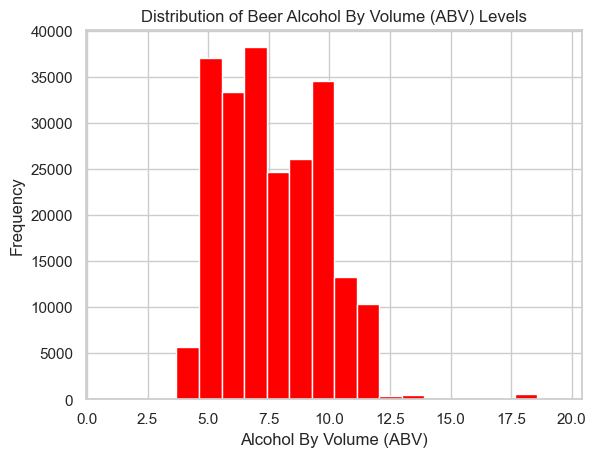

In [3]:
plt.hist(beers['beer_ABV'], bins=20, color='red')

plt.xlabel("Alcohol By Volume (ABV)")
plt.ylabel("Frequency")
plt.title("Distribution of Beer Alcohol By Volume (ABV) Levels")

plt.show()

<AxesSubplot: xlabel='beer_ABV'>

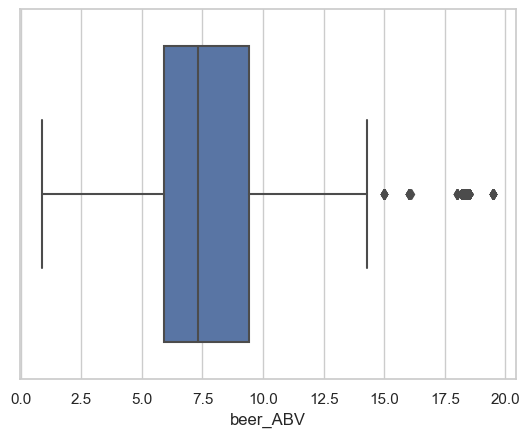

In [154]:
z = (beers["beer_ABV"] - beers["beer_ABV"].mean()) / beers["beer_ABV"].std()
outliers = beers[(z > 3) | (z < -3)]
sns.boxplot(x=beers["beer_ABV"])

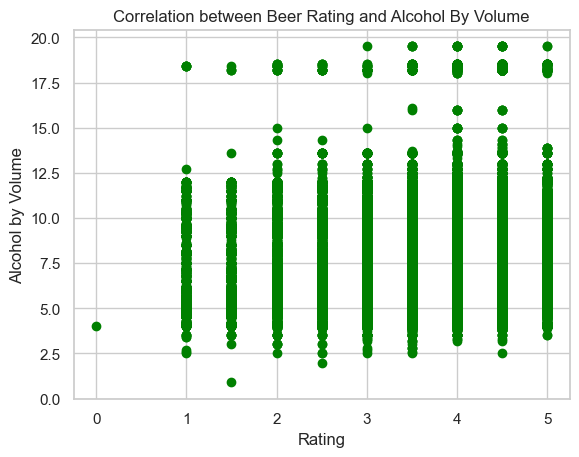

In [152]:
plt.scatter(beers['review_overall'], beers['beer_ABV'], color='green')

plt.xlabel("Rating")
plt.ylabel("Alcohol by Volume")
plt.title("Correlation between Beer Rating and Alcohol By Volume")

plt.show()

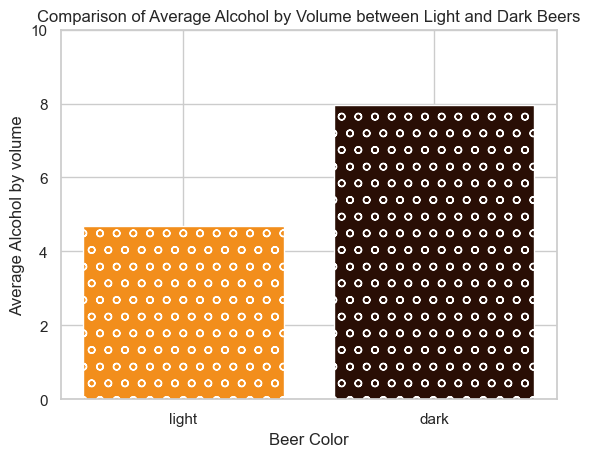

In [153]:
beers['beer_color'] = ['light' if x <= 5 else 'dark' for x in beers['beer_ABV']]

grouped = beers.groupby('beer_color').mean()

light = grouped.loc['light', 'beer_ABV']
dark = grouped.loc['dark', 'beer_ABV']

plt.bar(['light', 'dark'], [light, dark], color=['#f28e1c', '#290E05'], hatch='o')

plt.xlabel("Beer Color")
plt.ylabel("Average Alcohol by volume")
plt.title("Comparison of Average Alcohol by Volume between Light and Dark Beers")

plt.ylim(0,10)

plt.show()

## Popularity

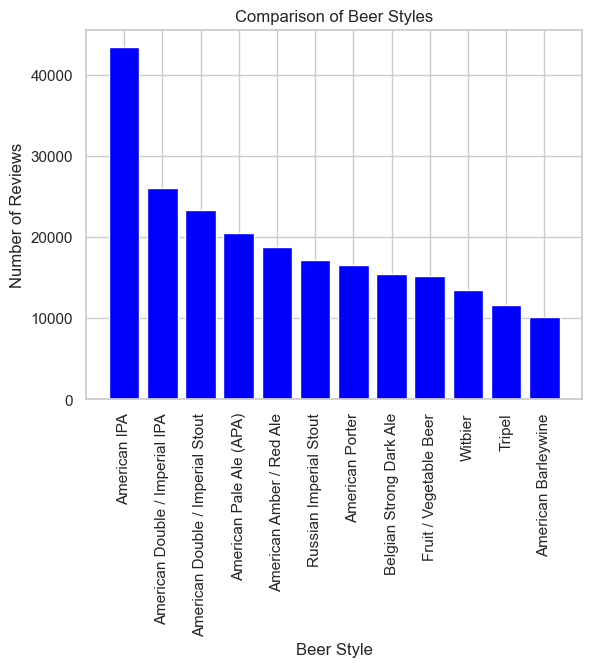

In [157]:
grouped = beers.groupby('beer_style').count().sort_values(by='beer_name', ascending=False)

plt.bar(grouped.index, grouped['review_appearance'], color='blue')

plt.xlabel("Beer Style")
plt.ylabel("Number of Reviews")
plt.title("Comparison of Beer Styles")

plt.xticks(rotation = 90)

plt.show()

Text(0.5, 1.0, 'Top 10 most popular beers')

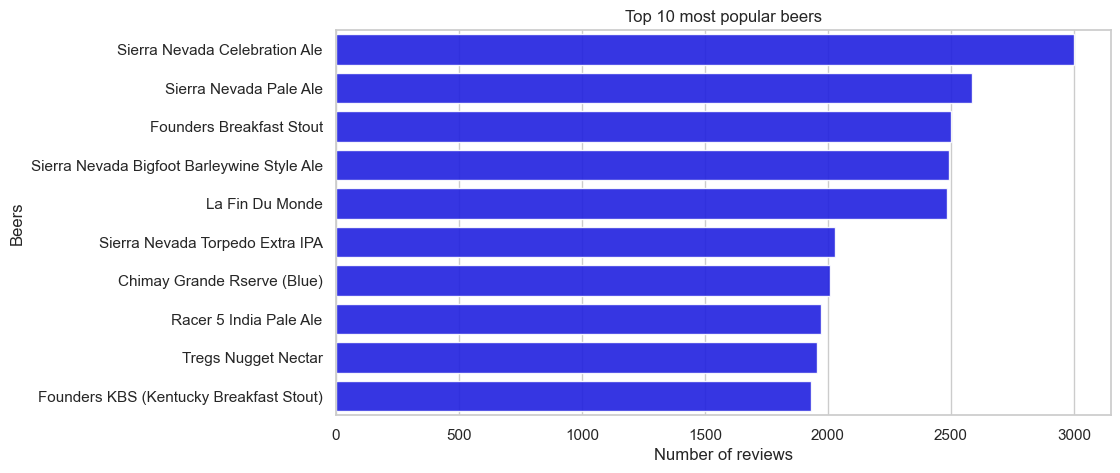

In [158]:
grouped = beers.groupby(['beer_name']).agg({'review_text':'size'}).rename(columns={'review_text':'count'}).sort_values('count', ascending=False).reset_index().head(10)

f, ax = plt.subplots(figsize=(10, 5))

sns.barplot(x='count', y='beer_name', data=grouped, label="Number of Reviews", color="blue", alpha=0.9)

plt.ylabel('Beers')
plt.xlabel('Number of reviews')
plt.title("Top 10 most popular beers")

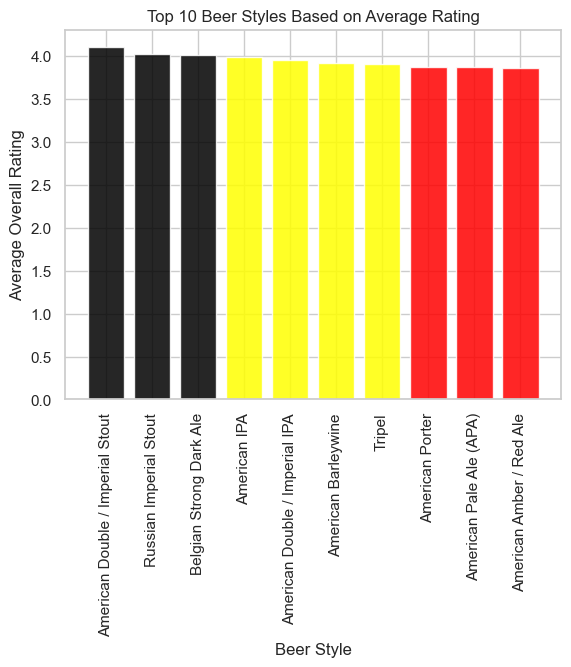

In [120]:
grouped = beers.groupby('beer_style').mean()

grouped = grouped.sort_values(by='review_overall', ascending=False)

grouped = grouped.head(10)

plt.bar(grouped.index, grouped['review_overall'], alpha=0.85, color=['black', 'black', 'black', 'yellow', 'yellow', 'yellow', 'yellow', 'red', 'red', 'red'])

plt.xlabel("Beer Style")
plt.ylabel("Average Overall Rating")
plt.title("Top 10 Beer Styles Based on Average Rating")
plt.xticks(rotation = 90)

plt.show()


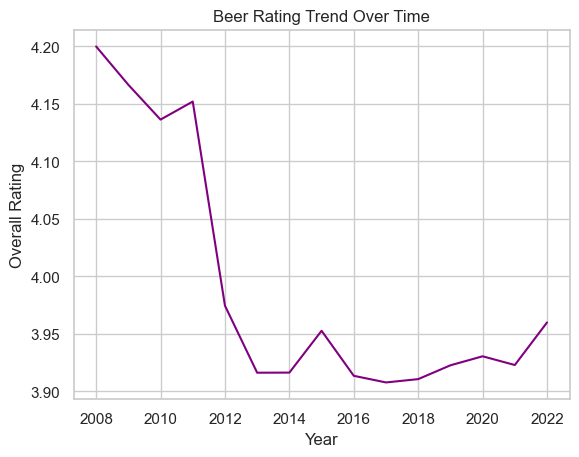

In [114]:
beers['review_time'] = pd.to_datetime(beers['review_time'], unit='s')

grouped = beers.groupby(beers['review_time'].dt.year).mean()

plt.plot(grouped.index + 10, grouped['review_overall'], color='purple')

plt.xlabel("Year")
plt.ylabel("Overall Rating")
plt.title("Beer Rating Trend Over Time")

plt.show()

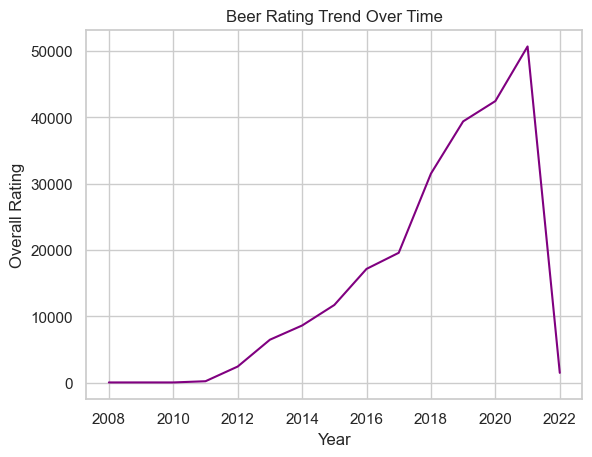

In [7]:
beers['review_time'] = pd.to_datetime(beers['review_time'], unit='s')

grouped = beers.groupby(beers['review_time'].dt.year).count()

plt.plot(grouped.index + 10, grouped['review_overall'], color='purple')

plt.xlabel("Year")
plt.ylabel("Overall Rating")
plt.title("Beer Rating Trend Over Time")

plt.show()

## Beer and style rating

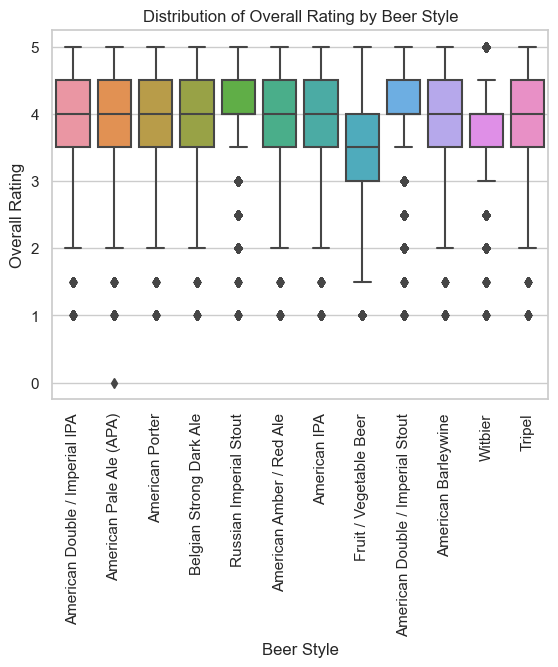

In [10]:
sns.boxplot(x='beer_style', y='review_overall', data=beers)

plt.xlabel("Beer Style")
plt.ylabel("Overall Rating")
plt.title("Distribution of Overall Rating by Beer Style")

plt.xticks(rotation=90)

plt.show()

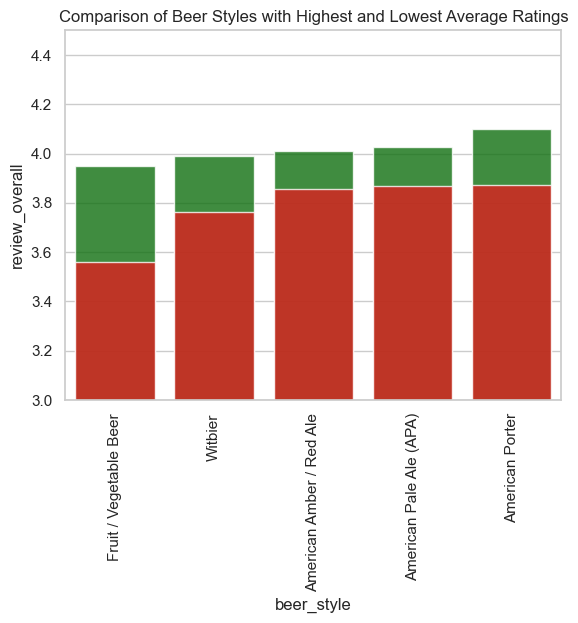

In [118]:
grouped = beers.groupby("beer_style").mean()

grouped = grouped.sort_values(by="review_overall")

highest_rated = grouped.iloc[-5:]
lowest_rated = grouped.iloc[:5]
sns.barplot(x=highest_rated.index, y="review_overall", data=highest_rated, color="green", alpha=0.8)

sns.barplot(x=lowest_rated.index, y="review_overall", data=lowest_rated, color="red", alpha=0.8)

plt.title("Comparison of Beer Styles with Highest and Lowest Average Ratings")
plt.xticks(rotation = 90)

plt.ylim(3,4.5)

plt.show()


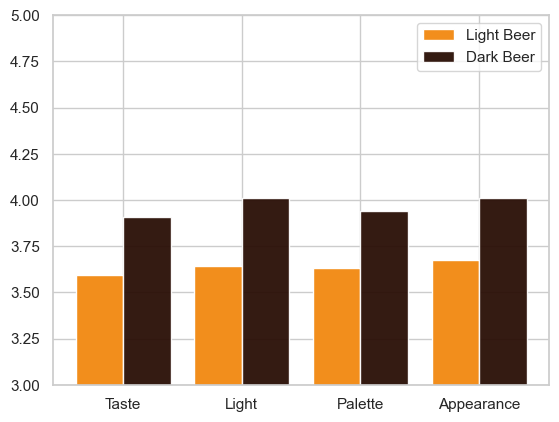

In [43]:
lightBeers = beers[beers.beer_color == 'light']
darkBeers = beers[beers.beer_color == 'dark']

taste_light = lightBeers['review_taste'].mean()
taste_dark = darkBeers['review_taste'].mean()

aroma_light = lightBeers['review_aroma'].mean()
aroma_dark = darkBeers['review_aroma'].mean()

palette_light = lightBeers['review_palette'].mean()
palette_dark = darkBeers['review_palette'].mean()

appearance_light = lightBeers['review_appearance'].mean()
appearance_dark = darkBeers['review_appearance'].mean()

labels = ['Taste', 'Light', 'Palette', 'Appearance']
lightArray = [taste_light, aroma_light, palette_light, appearance_light]
darkArray = [taste_dark, appearance_dark, palette_dark, appearance_dark]

x = np.arange(len(labels))
width = 0.4

plt.ylim(3,5)

plt.bar(x-0.2, lightArray, width, color="#f28e1c")
plt.bar(x+0.2, darkArray, width, color="#290E05", alpha=0.95)
plt.xticks(x, labels)

plt.legend(["Light Beer", "Dark Beer"])
plt.show()

## Honorable Mentions

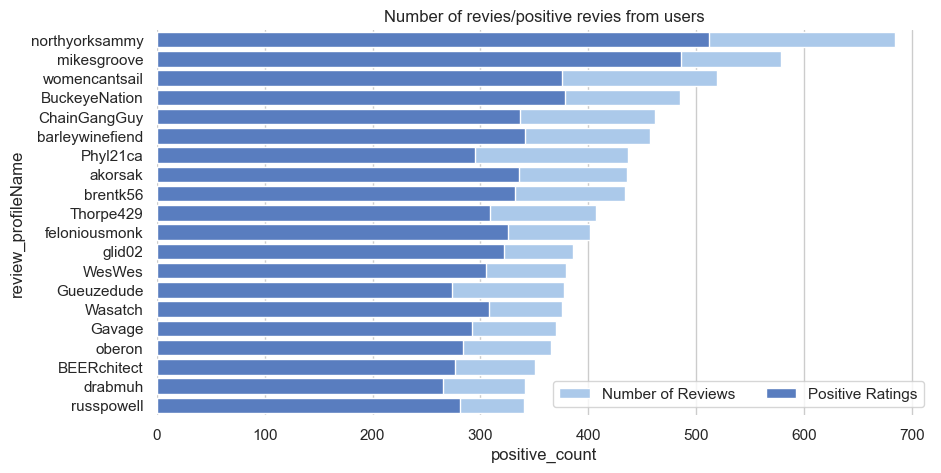

In [159]:
grouped = beers.groupby(['review_profileName']).agg({'beer_name':'size', 'review_overall':'mean'}).rename(columns={'beer_name':'count', 'review_overall':'rating'}).sort_values('count', ascending=False).reset_index().head(20)

f, ax = plt.subplots(figsize=(10, 5))

sns.set_color_codes("pastel")
sns.barplot(x="count", y="review_profileName", data=grouped, label="Number of Reviews", color="b")

grouped['positive_count'] = grouped['rating']/5 *grouped['count']

sns.set_color_codes("muted")
sns.barplot(x="positive_count", y="review_profileName", data=grouped,
            label="Positive Ratings", color="b")

plt.title('Number of revies/positive revies from reviewers')
ax.legend(ncol=2, loc="lower right", frameon=True)
sns.despine(left=True, bottom=True)